## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Shlomo 7580
# student 2:
# student 3:
# student 4:
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.core.interactiveshell import InteractiveShell
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import warnings

# Configure the interactive shell to display multiple outputs per cell
InteractiveShell.ast_node_interactivity = "all"

# Suppress warnings for cleaner output
warnings.simplefilter("ignore")
%matplotlib inline

In [3]:

train_data = pd.read_csv('cancer_train.csv')
test_data = pd.read_csv('cancer_test.csv')

# Display the first few rows of the training and testing datasets
print("Training Dataset:")
train_data.head()

print("Testing Dataset:")
test_data.head()

Training Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


Testing Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


In [25]:
# Checking for nulls, Nans, and duplicates in both datasets

print("Training Dataset Information:")
train_data.info()

print("Testing Dataset Information:")
test_data.info()


Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 

In [26]:
# Utility function to check for nulls, Nans, and duplicates in the dataset
def check_data_quality(df: pd.DataFrame):
    nan_count = df.isna().sum().sum()
    null_count = df.isnull().sum().sum()
    duplicate_count = df.duplicated().sum()
    print(f'This dataset contains:\n Nans: {nan_count}\n Nulls: {null_count}\n Duplicates: {duplicate_count}')
    return nan_count, null_count, duplicate_count

# Quality check on training and testing datasets
print("Training Dataset Quality Check:")
check_data_quality(train_data)

print("Testing Dataset Quality Check:")
check_data_quality(test_data)


Training Dataset Quality Check:
This dataset contains:
 Nans: 0
 Nulls: 0
 Duplicates: 0


(0, 0, 0)

Testing Dataset Quality Check:
This dataset contains:
 Nans: 0
 Nulls: 0
 Duplicates: 0


(0, 0, 0)

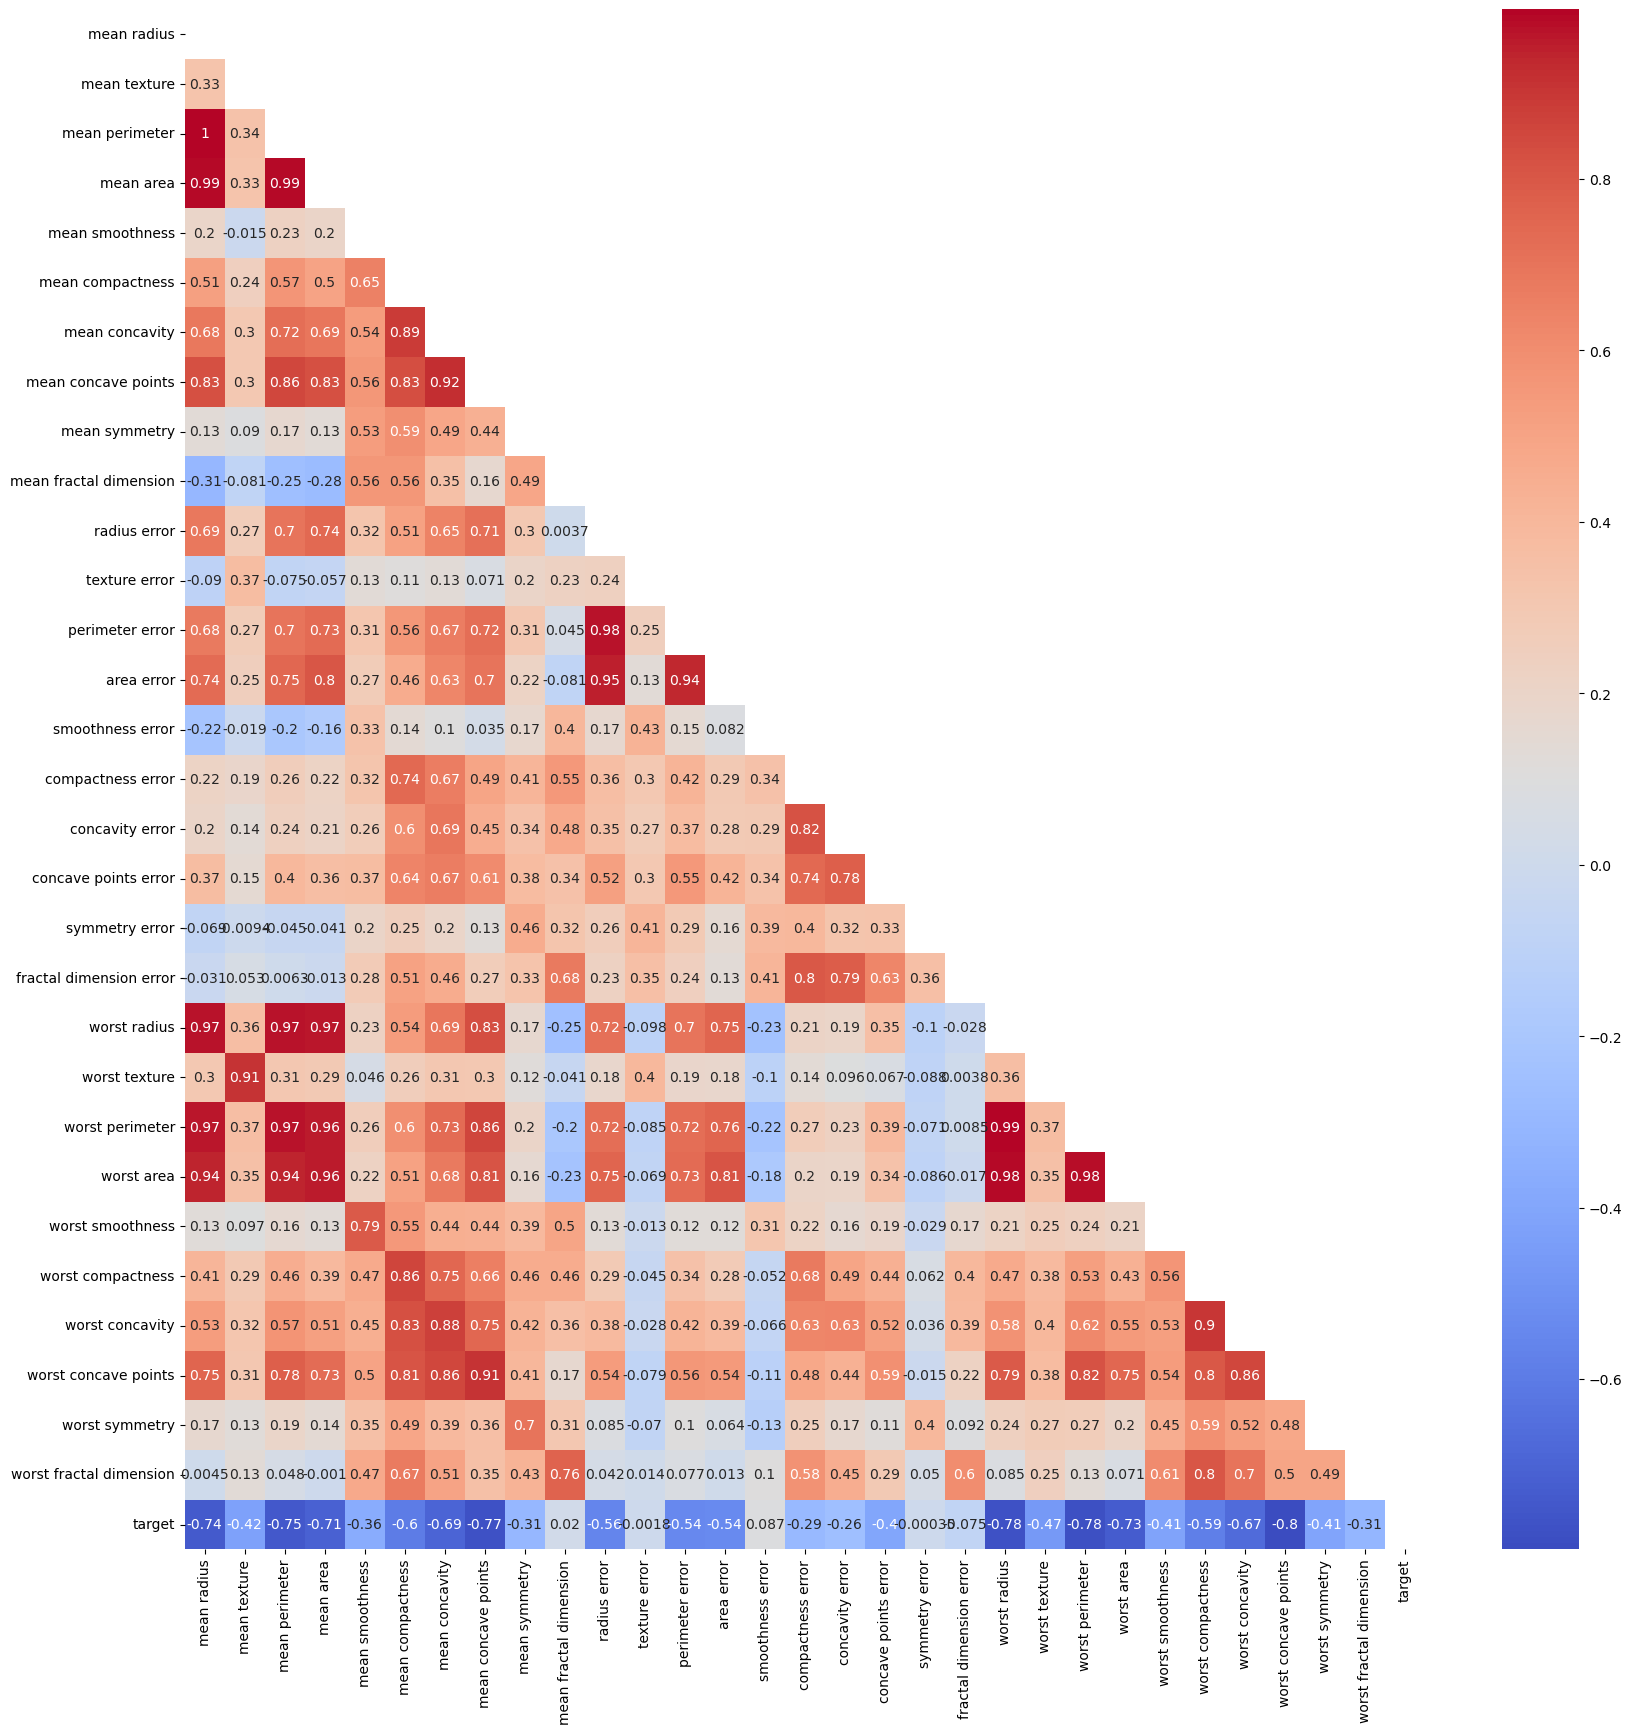

In [16]:
# Visualizing Correlation in the Dataset
def plot_correlation_heatmap(df: pd.DataFrame):
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, mask=mask, cmap="coolwarm")
    plt.show()

# Plotting correlation heatmap for training data
plot_correlation_heatmap(train_data)

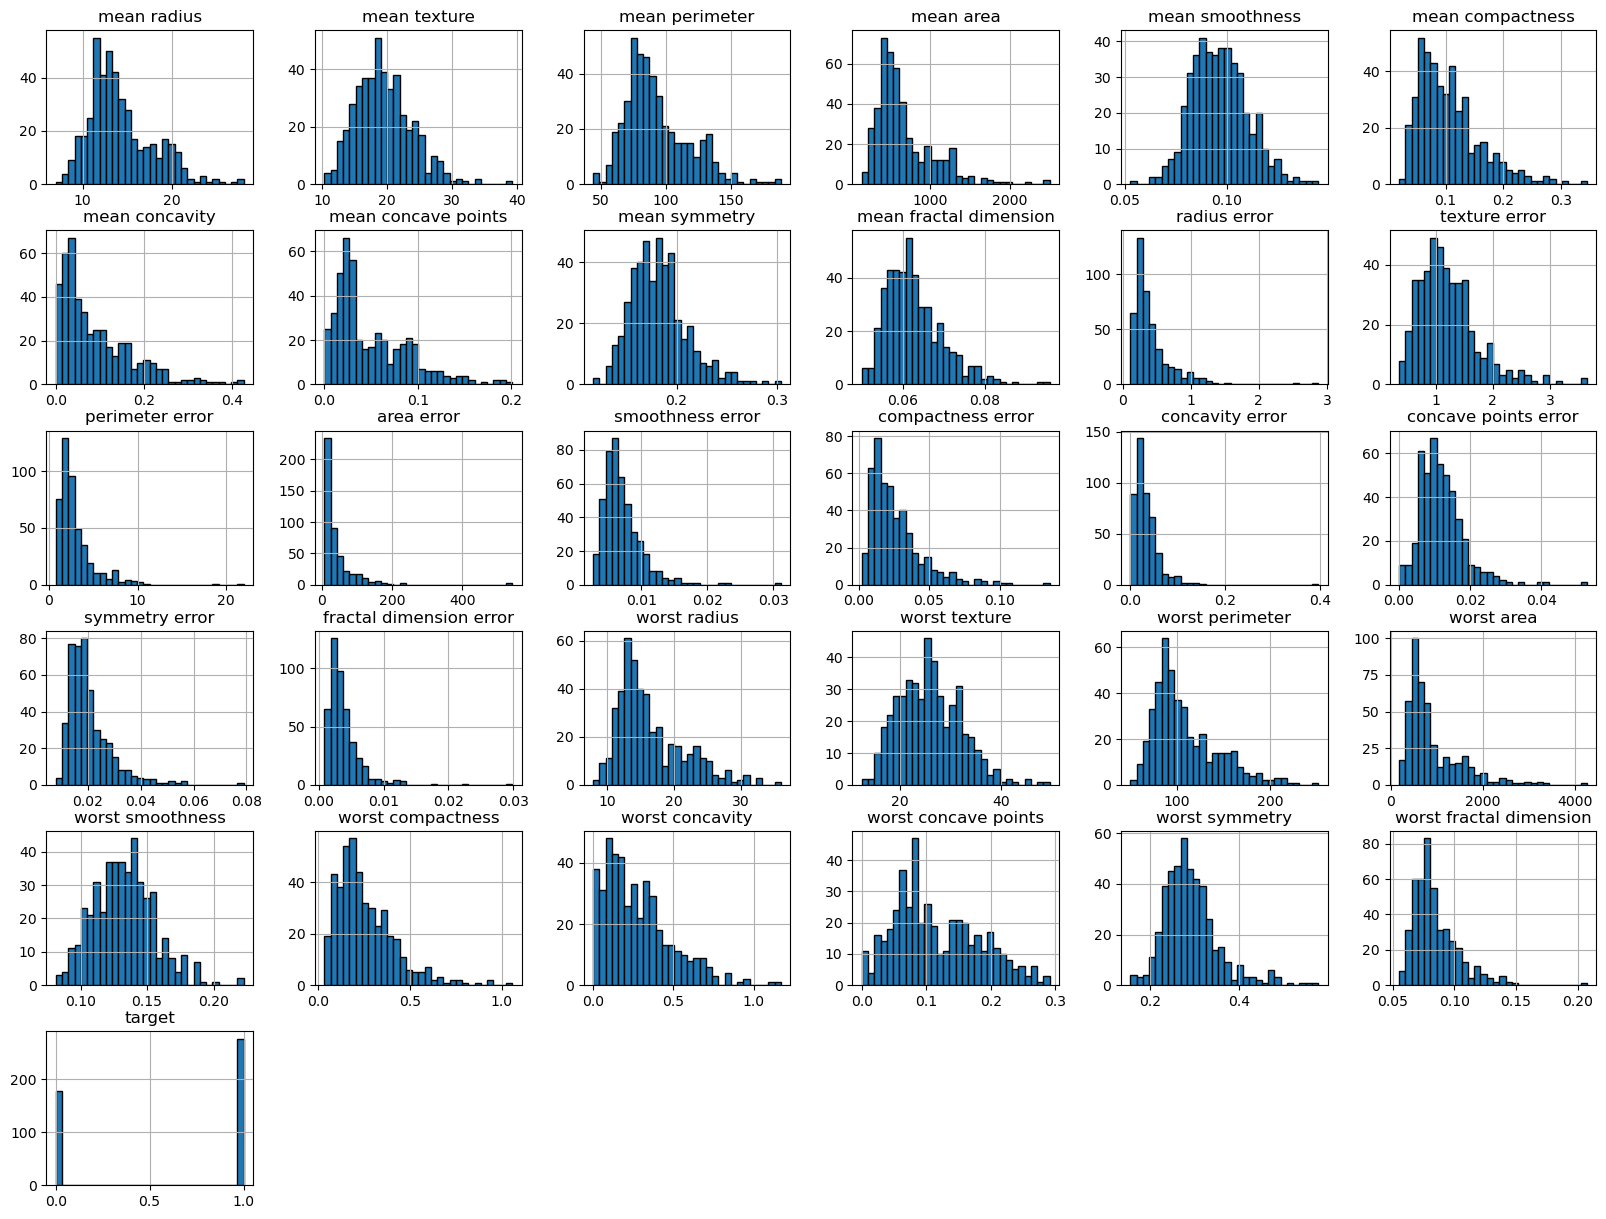

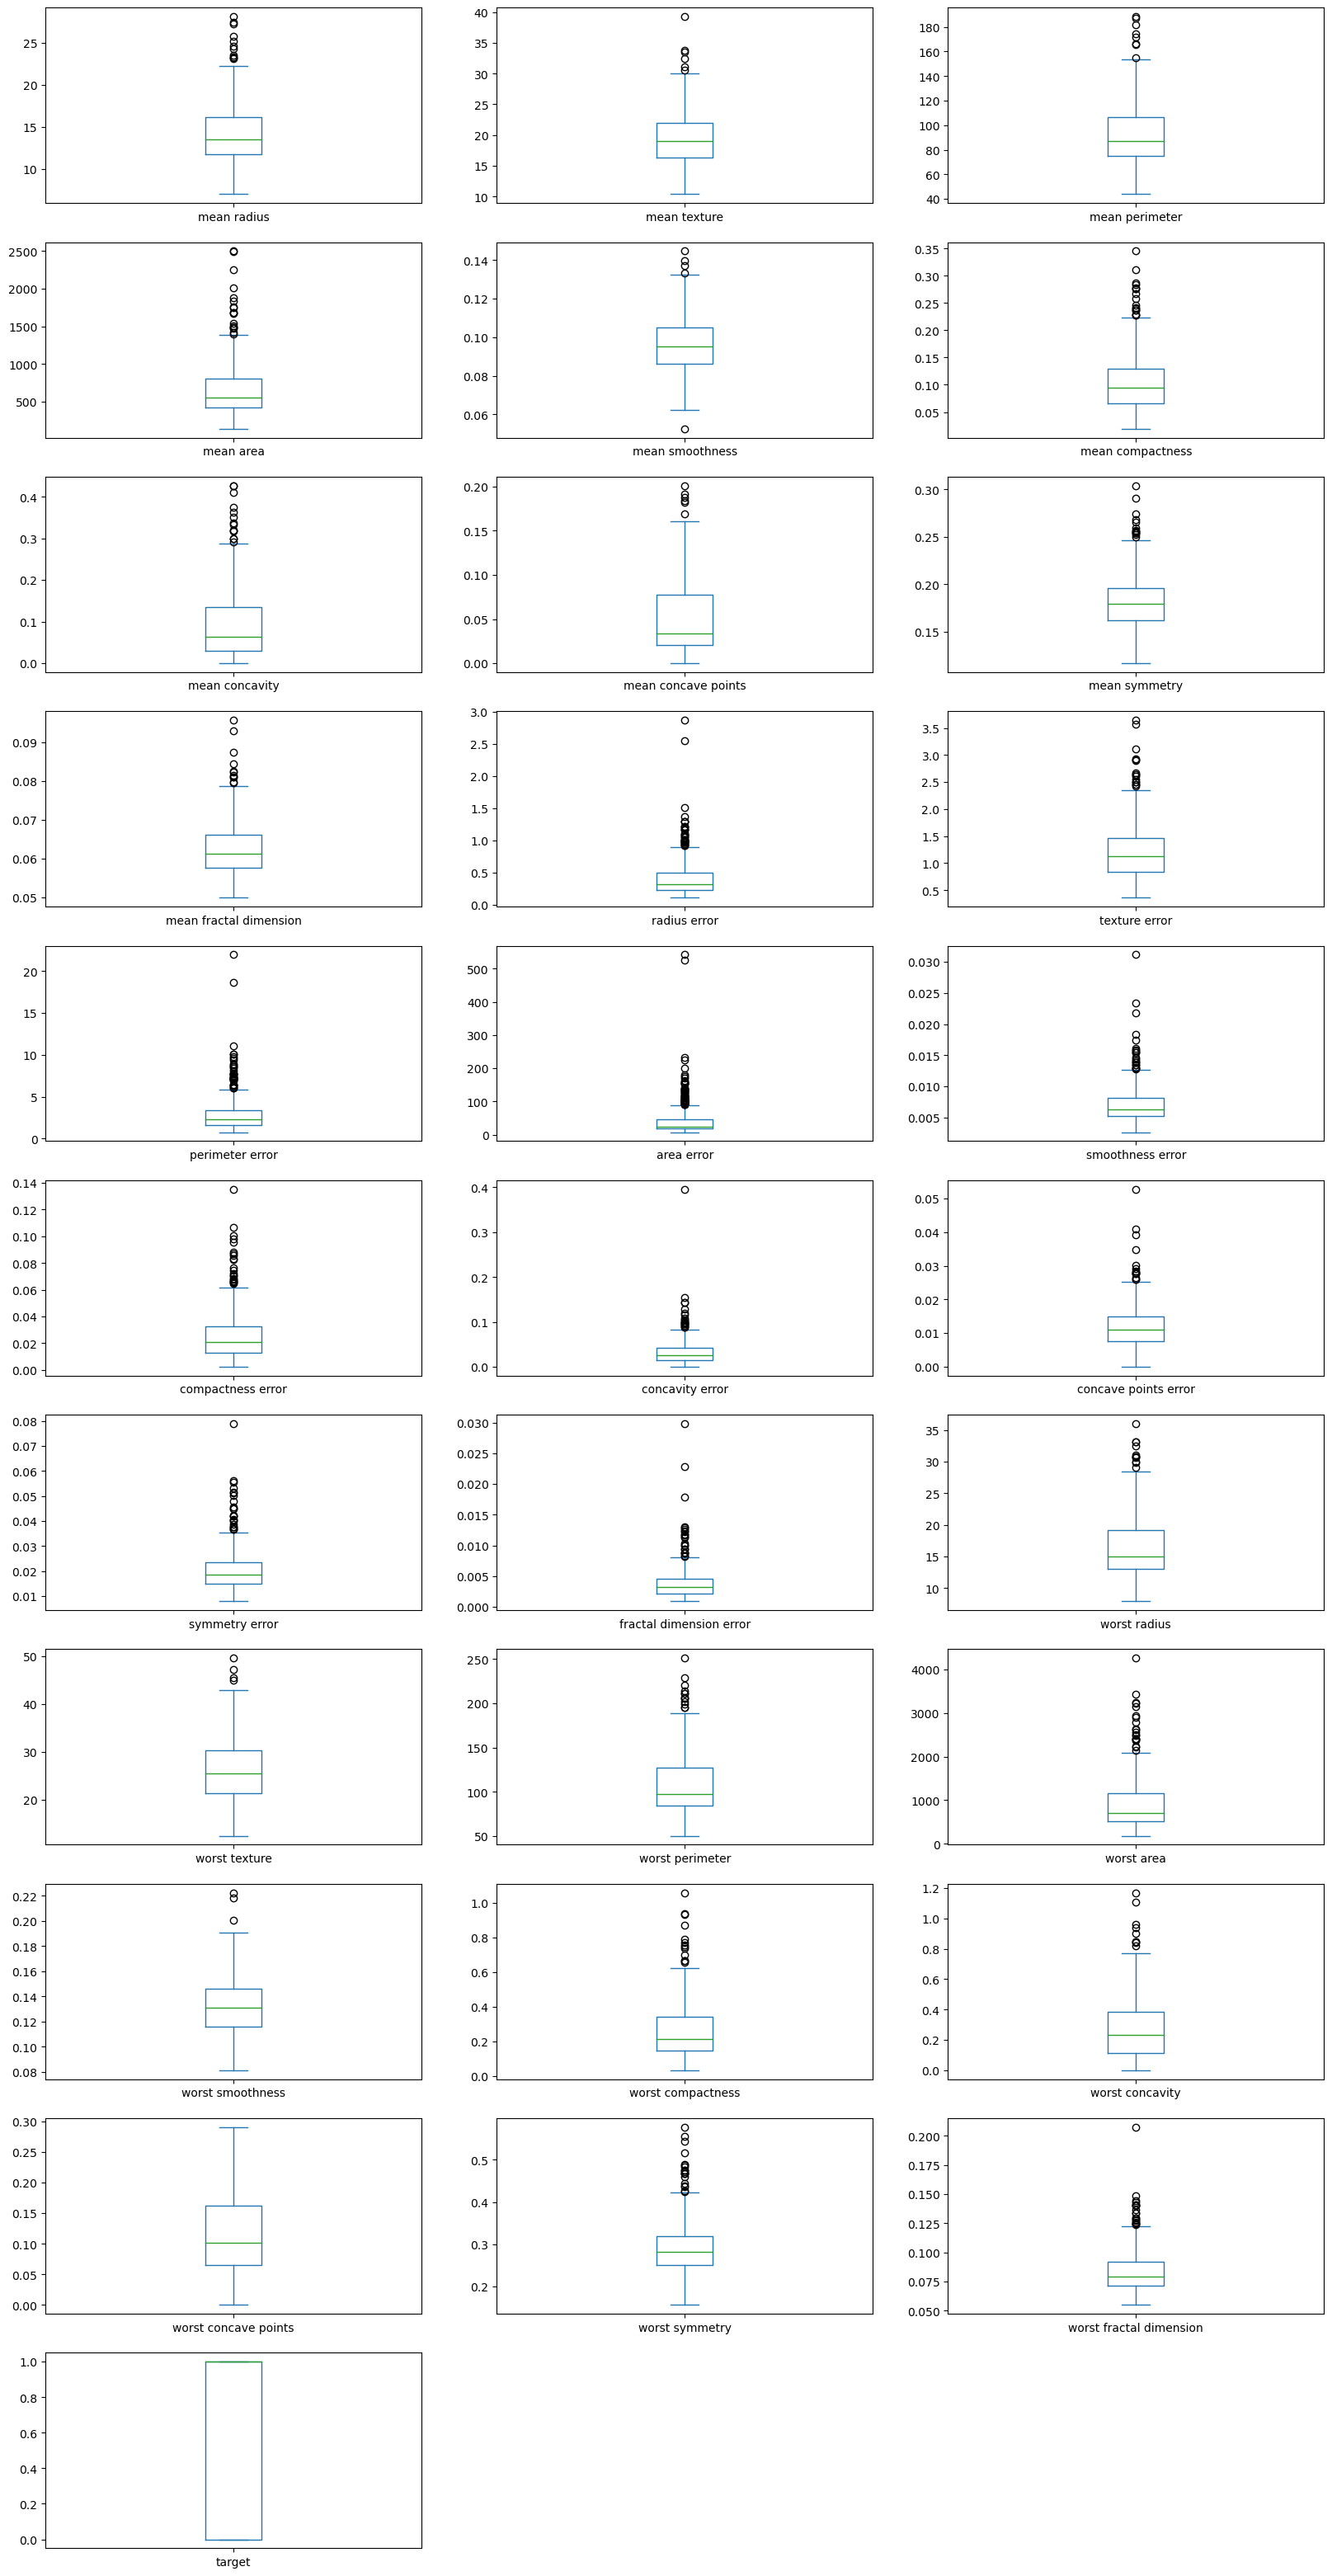

In [17]:
# Checking for outliers using distribution and box plots
def plot_distributions(df: pd.DataFrame, figsize: tuple):
    df.hist(figsize=figsize, bins=30, edgecolor='black')
    plt.show()

def plot_boxplots(df: pd.DataFrame, figsize: tuple):
    df.plot(kind='box', subplots=True, layout=(11, 3), figsize=figsize)
    plt.show()

# Visualizing distributions and outliers in training data
plot_distributions(train_data, (20, 15))
plot_boxplots(train_data, (20, 40))

### Conclusion:
The plots reveal that there are some outliers in the data, which could affect model performance.

Next, let's perform Principal Component Analysis (PCA) to reduce dimensions and understand the variance explained by each component:

PCA(n_components=30)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Variance Explained')

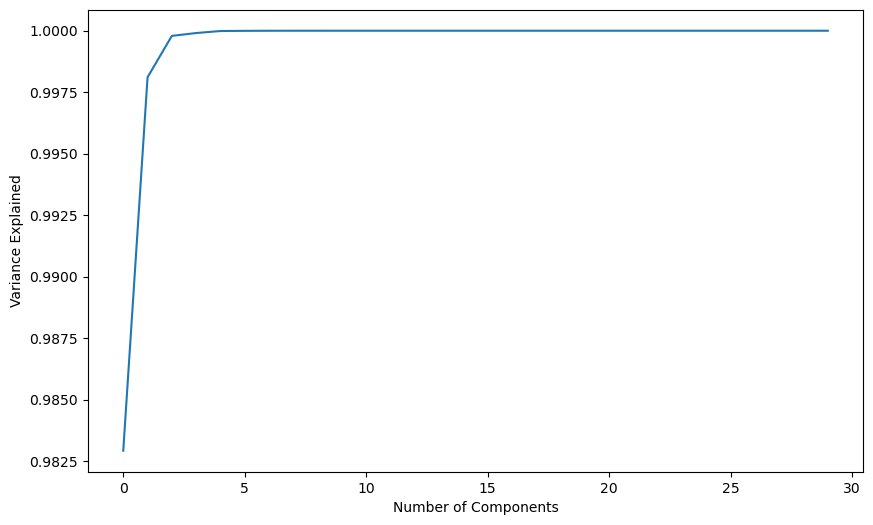

In [27]:
# Principal Component Analysis (PCA) to reduce dimensions
pca = PCA(n_components=30)
pca.fit(train_data.drop('target', axis=1))

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

### Conclusion:
We can see that with just a few components, we can retain most of the variance in the dataset.

Next, let's reduce the data to 2 components based on explained variance:
The dimensionality reduction helps in simplifying the dataset for model training.

In [18]:
# Reducing to 2 components based on explained variance
TARGET_COLUMN = 'target'
X_train = train_data.drop(TARGET_COLUMN, axis=1)
Y_train = train_data[TARGET_COLUMN]
X_test = test_data.drop(TARGET_COLUMN, axis=1)
Y_test = test_data[TARGET_COLUMN]

pca_2d = PCA(n_components=2)
X_train_pca = pca_2d.fit_transform(X_train)
X_test_pca = pca_2d.transform(X_test)

# Display the first few rows of the transformed datasets
display(pd.DataFrame(X_train_pca, columns=['PC1', 'PC2']).head())
display(pd.DataFrame(X_test_pca, columns=['PC1', 'PC2']).head())

,PC1,PC2
0,-193.121798,-40.665845
1,-641.318944,-57.757387
2,983.377020,87.039714
3,-763.061603,-35.697310
4,498.969014,74.137789


,PC1,PC2
0,25.283238,124.178431
1,-40.385666,13.069280
2,830.917505,17.090601
3,-810.101241,-58.932452
4,-360.868189,28.383222


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

Next, let's train and evaluate models using K-Nearest Neighbors (KNN) and Naive Bayes (NB):

In [19]:
# Training and Evaluating Models
# K-Nearest Neighbors (KNN) and Naive Bayes (NB)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# KNN Classifier
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 15],
    'metric': ['euclidean', 'manhattan']
}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1')
knn.fit(X_train_pca, Y_train)

print('Best KNN Parameters:', knn.best_params_)
print('Best KNN Score:', knn.best_score_)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 15]},
             scoring='f1')

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best KNN Score: 0.9488808242698402


The best KNN model uses the Manhattan metric with 9 neighbors, achieving a best F1 score of 0.9489.

Next, let's train and evaluate the Naive Bayes model:

In [20]:
# Naive Bayes Classifier
nb_params = {
    'priors': [None, [0.1] * 2],
    'var_smoothing': [1e-3, 1e-6, 1e-9, 1e-12]
}
nb = GridSearchCV(GaussianNB(), nb_params, cv=5, scoring='f1')
nb.fit(X_train_pca, Y_train)

print('Best NB Parameters:', nb.best_params_)
print('Best NB Score:', nb.best_score_)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.1, 0.1]],
                         'var_smoothing': [0.001, 1e-06, 1e-09, 1e-12]},
             scoring='f1')

Best NB Parameters: {'priors': None, 'var_smoothing': 0.001}
Best NB Score: 0.9252304490038655


The best Naive Bayes model uses no priors with a var_smoothing of 0.001, achieving a best F1 score of 0.9252.

## Part 4 - Apply on test and show model performance estimation

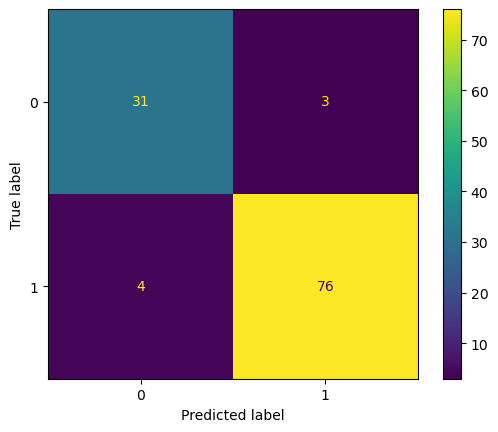

Accuracy: 0.9385964912280702
Precision: 0.9620253164556962
Recall: 0.95
F1 Score: 0.9559748427672956


In [21]:
# Applying the Best Model on Test Set
best_knn = knn.best_estimator_
Y_pred = best_knn.predict(X_test_pca)

# Confusion Matrix and Performance Metrics
conf_matrix = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()  # Ensure the plot is displayed

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')